# Praktikum

## Úvod

V tomto praktiku si předvedeme určení neznámé veličiny $C$ a její závoslost na veličině $T$. Budeme uvažovat komplikovaný vztah $$C = A \cdot B.$$
Veličíny $A$, $B$ a $T$ jsme určili měřením.

## Měření

In [1]:
import numpy
import pandas
import scipy.optimize

data = pandas.read_csv('data.csv')
data['C'] = data['A'] * data['B']

def f(x, C0, C1):
    return C0 * x + C1

popt, pcov = scipy.optimize.curve_fit(f, data['T'], data['C'])
x = numpy.linspace(data['T'].min(), data['T'].max(), 100)
y = popt[0] * x + popt[1];

In [26]:
import tabulate
from IPython.display import display, HTML, Latex, set_matplotlib_formats
table_latex = tabulate.tabulate(data, tablefmt="latex_booktabs", headers=['#'] + list(data.columns.values),
                                floatfmt='f')
t = Latex(table_latex)

formatters = [
    '{:g}',
    '{:0.1f}',
    '{:0.4f}',
    '{:0.1f}',
    '{:0.4f}',
]
formatted_table = list()
for it in t.data.split('\n')[4:-2]:
    values = [float(itt) for itt in it.replace('\\', '').split('&')]
    formatted_table.append([(f.format(v)) for f, v in zip(formatters, values)])
    
formatted_latex = ['\\begin{table}', '\\centering'] + \
                  t.data.split('\n')[:4] + \
                  [' & '.join(l) + r' \\' for l in formatted_table] + \
                  t.data.split('\n')[-2:] + \
                  ['\\end{table}']
t.data = '\n'.join(formatted_latex)
display(t)

<IPython.core.display.Latex object>

In [4]:
import IPython
import matplotlib.pyplot as plt
IPython.display.set_matplotlib_formats('pdf', 'png')
font_size = 11
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 6, 3.5
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['font.size'] = font_size
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = font_size
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['xtick.major.pad'] = 4.0
plt.rcParams['ytick.major.pad'] = 4.0
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

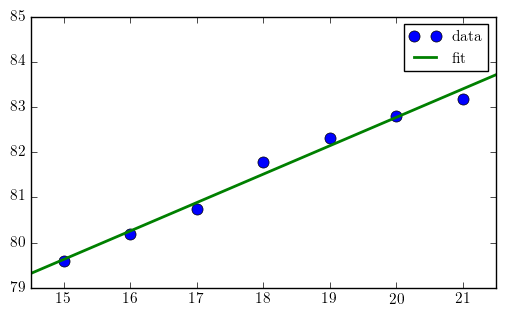

In [5]:
plt.plot(data['T'], data['C'], 'o', label='data')
x = numpy.linspace(14.0, 22.0, 100)
y = popt[0] * x + popt[1]
plt.plot(x, y, label='fit')
plt.legend(loc='best')
plt.xlim([14.5, 21.5]);